<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/EnsembleTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Great Learning / Deakin (MDS) Project Submission**
## **Ensemble Techniques Project**
## &emsp; - By Nishant Killedar
<hr>

> A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt to retain customers. The end goal is to develop focused customer retention programs

> The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer churn and will increase the focus on strategising customer retention.

**Demonstrate the ability to fetch, process and leverage data to generate useful predictions using Ensemble Techniques .**
<br><br>
<hr> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

<hr>

**Section 1 : Data Understanding & Exploration: [5 Marks]**
<li>A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]
<li>B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]
<li>C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]
<li>D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Mark]

<hr>

In [19]:
tcc1 = pd.read_csv('/content/drive/MyDrive/datasets/ensm/TelcomCustomer-Churn_1.csv')
tcc2 = pd.read_csv('/content/drive/MyDrive/datasets/ensm/TelcomCustomer-Churn_2.csv')

In [20]:
print('TelcomCustomer-Churn_1 :', tcc1.shape)
print('TelcomCustomer-Churn_2 :', tcc2.shape)

TelcomCustomer-Churn_1 : (7043, 10)
TelcomCustomer-Churn_2 : (7043, 12)


In [21]:
data = pd.merge(tcc1, tcc2, on='customerID')
print('Merged DataFrame :',data.shape)

Merged DataFrame : (7043, 21)


In [22]:
all_cols = (tcc1.columns).append(tcc2.columns).drop_duplicates()
merge_cols  = data.columns
if set(all_cols).difference(set(merge_cols)) == set() : 
  print('All columns are included in the merge data frame')

All columns are included in the merge data frame


<hr>

**Section 2 : Data Cleaning & Analysis: [15 Marks]**
<li>A. Impute missing/unexpected values in the DataFrame. [2 Marks]
<li>B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]<br>
&emsp;&emsp;[For Example: MonthlyCharges, TotalCharges]
<li>C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. [4 Marks]
<li>D. Share insights for Q2.c. [2 Marks]
<li>E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]
<li>F. Split the data into 80% train and 20% test. [1 Marks]
<li>G. Normalize/Standardize the data with the best suitable approach. [2 Marks]

<hr>

In [26]:
# Convert the type of the TotalCharges column to Float with coerce 
# This will make sure the NaN values show up in the isnull().sum() 
data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<hr>

> <li>TotalCharges has 11 rows with null values <br>
> <li>Let's look @ the relationship between monthly charges & total charges 
> <li>First, calculate what is the ratio of Total to Monthly charges 
> <li>Take the median of all Total to Monthly ratios ( excluding the NaN rows )
> <li>Multiply the Monthly Charges with this median & populate Total Charges for NaN rows<br>

> **We can just do the median of TotalCharges, however as MonthlyCharges are typically included in TotalCharges, finding the median ratio between these 2 features and applying it to the null rows will make it more accurate**

<hr>

<Axes: >

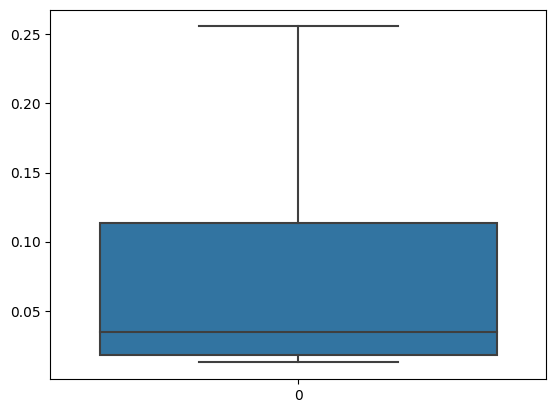

In [27]:
sns.boxplot(data['MonthlyCharges']/data['TotalCharges'], showfliers=False)

In [31]:
factor = data['TotalCharges']/data['MonthlyCharges']
factor = factor.dropna() # drop NaN values so that we can calculate the median for the rest
median = np.median(factor)

In [32]:
data.loc[data.loc[:,'TotalCharges'].isnull(),'TotalCharges']=data.loc[:,'MonthlyCharges']*median

In [33]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<hr>

> <li>TotalCharges is of type Object, convert this to Float <br>
> <li>SeniorCitizen is of type int, however it is a categorical variable, so convert to Object ( for analysis only ) <br>

<hr>

In [35]:
data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric, errors='coerce')
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<hr>

> <li>Function to take dataframe as input & print Pie Charts
> <li>An additional parameter 'churn' has been provided to view distribution across categorical variables for churned customers 

<hr>

In [37]:
def create_pie_charts(data, churn='all') :
  # Set basic plot font size
  plt.rc('font', size=8) #controls default text size
  
  # Identify all categorical columns 
  cat_cols = data.select_dtypes(include=object).columns.tolist()
  del cat_cols[0]
  del cat_cols[-1]

  # Setup subplots 
  fig, axs = plt.subplots(4,4, figsize=(10,12))
  palette_color = sns.color_palette('muted')

  # Loop through each subplot 
  for i, ax in enumerate(axs.flat) :
    col = cat_cols[i]
    if churn != 'all' :
      coldata = data[data['Churn']==churn][col].value_counts()
    else : 
      coldata = data[col].value_counts()
    labels = coldata.index.tolist()
    ax.grid(True)
    ax.set_title(col, fontsize=8)
    ax.pie(coldata, colors=palette_color, autopct='%.0f%%')
    ax.legend(labels)   

  plt.show()

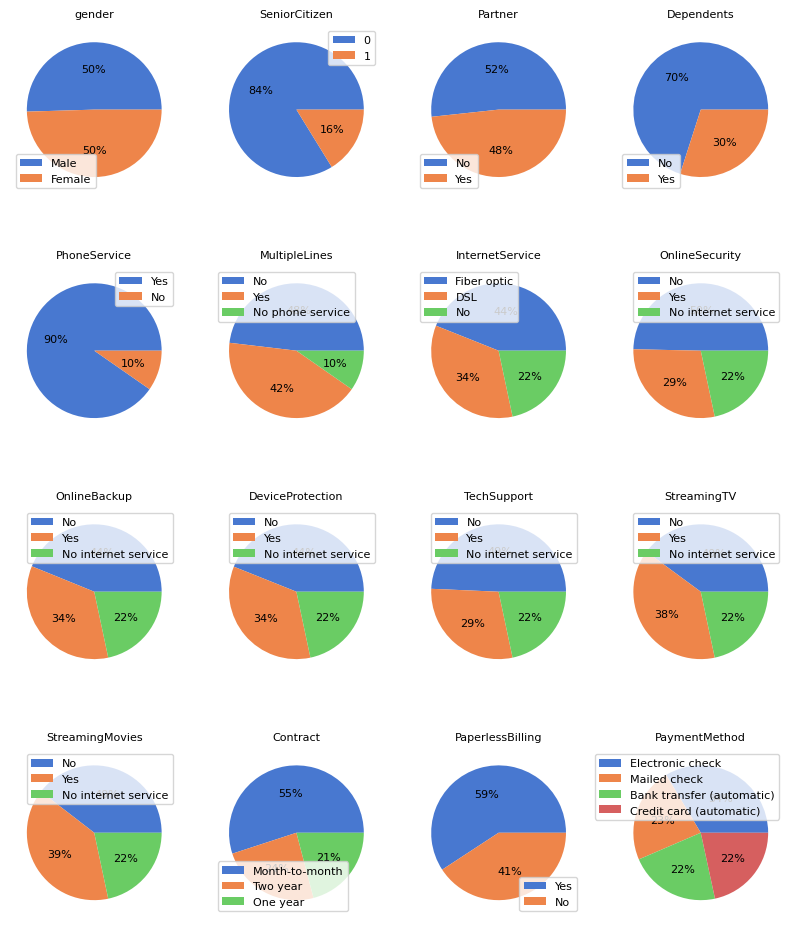

In [38]:
# Pie charts for categorical variables for all customer data 
create_pie_charts(data)

<hr>

**Insights based on the pie charts ( univariate analysis )**
> <li>The telecom companies' products are used equally by men and women 
> <li>88% of customers are on a month-to-month contract. This is an area which can be improved, so we can tie in customers for longer duration
> <li> 25% of customers are still not on paperless billing, which adds to printing cost. This can be reduced, will require effort on capturing contact information for our customers & getting their consent 
> <li> 16% of customers still mail us a check for payments, which can be converted to automatic payments, as this delays receivables 
> <li> 22% of customers do not utilize internet service, this can be an area of focus to increase internet sales
> <li> 40% of customers do not stream movies using their internet connection, they can be offered a lower cost internet service based on usage for retention and tap into more similar customers
> <li> 44% customers do not use online backup or device protection services. These services can be offered to customers at a slightly lower cost or free for 1st year 

<hr>

<hr>

**Encode all categorical variables**

> <li> First, select all categorical columns and store them in a list
> <li> Delete the customerID column from this list as it is not categorical
> <li> Review the unique values for each categorical feature 
> <li> Replace unique values with numbers ( Label Encoding can be used but the approach of using a struct to replace provides better control on values )
> <li> Change the type for SeniorCitizen column to int (we had converted it to object earlier for our analysis)
<hr>

In [39]:
cat_cols = data.select_dtypes(include=object).columns.tolist()
del cat_cols[0]

pd.DataFrame(data[cat_cols]
             .melt(var_name='column', value_name='value')
             .value_counts()).rename(columns={0: 'counts'}).sort_values(by=['column', 'counts'])

counts
column           value                            
Churn            Yes                          1869
                 No                           5174
Contract         One year                     1473
                 Two year                     1695
                 Month-to-month               3875
Dependents       Yes                          2110
                 No                           4933
DeviceProtection No internet service          1526
                 Yes                          2422
                 No                           3095
InternetService  No                           1526
                 DSL                          2421
                 Fiber optic                  3096
MultipleLines    No phone service              682
                 Yes                          2971
                 No                           3390
OnlineBackup     No internet service          1526
                 Yes                          2429
                 No                           3088
OnlineSecurity   No internet service          1526
                 Yes                          2019
                 No                           3498
PaperlessBilling No                           2872
                 Yes                          4171
Partner          Yes                          3402
                 No                           3641
PaymentMethod    Credit card (automatic)      1522
                 Bank transfer (automatic)    1544
                 Mailed check                 1612
                 Electronic check             2365
PhoneService     No                            682
                 Yes                          6361
SeniorCitizen    1                            1142
                 0                            5901
StreamingMovies  No internet service          1526
                 Yes                          2732
                 No                           2785
StreamingTV      No internet service          1526
                 Yes                          2707
                 No                           2810
TechSupport      No internet service          1526
                 Yes                          2044
                 No                           3473
gender           Female                       3488
                 Male                         3555

In [40]:
replaceStruct = {
                "Churn" : {"No": 0, "Yes": 1 },
                "Contract": {"One year": 1, "Two year":2 , "Month-to-month": 0},
                "Dependents" : {"No": 0, "Yes": 1 },
                "DeviceProtection" : {"No internet service": -1, "No": 0 ,"Yes": 1},
                "InternetService" : {"No": 0, "DSL": 1, "Fiber optic": 2 },
                "MultipleLines" : {"No phone service" : -1,"No":0, "Yes":1},
                "OnlineBackup" : {"No internet service": -1, "No": 0 ,"Yes": 1},
                "OnlineSecurity" : {"No internet service": -1, "No": 0 ,"Yes": 1},
                "PaperlessBilling" : {"No": 0, "Yes": 1 },
                "PhoneService" : {"No": 0, "Yes": 1 },
                "Partner" : {"No": 0, "Yes": 1 },
                "PaymentMethod": {"Credit card (automatic)": 0, "Bank transfer (automatic)":1 , "Mailed check": 2, "Electronic check": 3},   
                "Partner" : {"No": 0, "Yes": 1 },  
                "StreamingMovies" : {"No internet service": -1, "No": 0 ,"Yes": 1},
                "StreamingTV" : {"No internet service": -1, "No": 0 ,"Yes": 1},
                "TechSupport" : {"No internet service": -1, "No": 0 ,"Yes": 1},
                "gender" : {"Female":1, "Male":0}
                 }

In [41]:
data=data.replace(replaceStruct)
data['SeniorCitizen'] = data['SeniorCitizen'].astype('int')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


<hr> 

><li> Data is now ready for normalization and splitting 

<hr>

In [43]:
x=data.iloc[:,1:20]
y=data['Churn']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, train_size=0.8)

In [47]:
print('Train Set % :',(x_train.shape[0]/x.shape[0])*100)
print('Test Set % :',(x_test.shape[0]/x.shape[0])*100)

Train Set % : 79.99432060201619
Test Set % : 20.005679397983815


In [48]:
ss = StandardScaler()
x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

<hr>

**Section 3 : Model building and performance improvement : [40 Marks]**
<li>A. Train a model using Decision tree and check the performance of the model on train and test data ( 4 marks )
<li>B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the 
differences observed in performance in Q3.a and Q3.b ( 5 marks )
<li>C. Train a model using Random forest and check the performance of the model on train and test data ( 4 marks )
<li>D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the 
differences observed in performance in Q3.c and Q3.d ( 5 marks )
<li>E. Train a model using Adaboost and check the performance of the model on train and test data ( 4 marks )
<li>F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the 
differences observed in performance in Q3.e and Q3.f ( 5 marks )
<li>G. Train a model using GradientBoost and check the performance of the model on train and test data ( 4 marks )
<li>H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide 
the differences observed in performance in Q3.g and Q3.h ( 5 marks )
<li>I. Provide detailed analysis of the below steps (4 marks ) :<br>
&emsp; &emsp;(1) Compare the performance of each model in train stage and test stage<br>
&emsp; &emsp;(2) Provide your observation on which model performed the best<br>
&emsp; &emsp;(3) Provide your reasoning on why the model performed best<br>
&emsp; &emsp;(4) Provide your final conclusion on your observation<br>

<hr>

In [49]:
clf_dtc = DecisionTreeClassifier()
clf_rfc = RandomForestClassifier()
clf_abc = AdaBoostClassifier()
clf_gbc = GradientBoostingClassifier()

<hr>

**A. Train a model using Decision tree and check the performance of the model on train and test data**

<hr>

In [50]:
clf_dtc.fit(x_train_std, y_train)
y_pred_trn = clf_dtc.predict(x_train_std)
y_pred_tst = clf_dtc.predict(x_test_std)
dtc_acc_trn = accuracy_score(y_pred_trn, y_train)
dtc_acc_tst = accuracy_score(y_pred_tst, y_test)
print('Train Accuracy :', dtc_acc_trn)
print('Test Accuracy :', dtc_acc_tst)

Train Accuracy : 0.9985800496982605
Test Accuracy : 0.7331440738112136


*The Decision Tree model is overfitting, train accuracy is 99% where as test accuracy is approximately 74%*

**B. Use grid search and improve the performance of the Decision tree model**

In [51]:
clf_dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

*Use grid search and improve the performance of the Decision tree model*

In [52]:
max_depth_range = np.arange(3,10)
min_samples_leaf_range = np.arange(1,5)
params = {'criterion': ['entropy', 'gini']
          ,'max_depth': max_depth_range
          ,'min_samples_leaf': min_samples_leaf_range}
dtc_gcv = GridSearchCV(clf_dtc, params, cv=5)
dtc_gcv.fit(x_train_std, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4])})

*Check the performance of the model on train and test data*

In [54]:
dtc_best = dtc_gcv.best_estimator_
dtc_best.fit(x_train_std, y_train)
y_pred_trn = dtc_best.predict(x_train_std)
y_pred = dtc_best.predict(x_test_std)
dtc_best_acc_tst = accuracy_score(y_pred, y_test)
dtc_best_acc_trn = accuracy_score(y_pred_trn, y_train)

In [55]:
print('Train Accuracy :', dtc_best_acc_trn)
print('Test Accuracy :', dtc_best_acc_tst)
print('Best Parameters :', dtc_gcv.best_params_)

Train Accuracy : 0.7987220447284346
Test Accuracy : 0.8034066713981547
Best Parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}


*Provide the differences observed in performance in Q3.a and Q3.b*
<hr> 

After tuning hyperparameters, the train accuracy has gone down to 80%, however the model is predicting on test data with the same accuracy. The model is performing better than the decision tree model before tuning 


<hr>

**C. Train a model using Random Forest and check the performance of the model on train and test data**

<hr>

In [56]:
clf_rfc.fit(x_train_std, y_train)
y_pred_trn = clf_rfc.predict(x_train_std)
y_pred_tst = clf_rfc.predict(x_test_std)
rfc_acc_trn = accuracy_score(y_pred_trn, y_train)
rfc_acc_tst = accuracy_score(y_pred_tst, y_test)
print('Train Accuracy :', rfc_acc_trn)
print('Test Accuracy :', rfc_acc_tst)

Train Accuracy : 0.9985800496982605
Test Accuracy : 0.7963094393186657



*The Random Forest model is overfitting, train accuracy is 99% where as test accuracy is approximately 79%*


<hr>

**D. Use grid search and improve the performance of the Random Forest model**
<hr>

In [57]:
clf_rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

*Use grid search and improve the performance of the Random tree model*

In [58]:
max_depth_range_rfc = np.arange(3,10)
min_samples_leaf_range_rfc = np.arange(1,5)
params = {'criterion': ['entropy', 'gini']
          ,'max_depth': max_depth_range_rfc
          ,'min_samples_leaf': min_samples_leaf_range_rfc}
rfc_gcv = GridSearchCV(clf_rfc, params, cv=5)
rfc_gcv.fit(x_train_std, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4])})

*Check the performance of the model on train and test data*

In [59]:
rfc_best = rfc_gcv.best_estimator_
rfc_best.fit(x_train_std, y_train)
y_pred_tst = rfc_best.predict(x_test_std)
y_pred_trn = rfc_best.predict(x_train_std)
rfc_best_acc_trn = accuracy_score(y_pred_trn, y_train)
rfc_best_acc_tst = accuracy_score(y_pred_tst, y_test)
print('Train Accuracy :', rfc_best_acc_trn)
print('Test Accuracy :', rfc_best_acc_tst)
print('Best Parameters :', rfc_gcv.best_params_)

Train Accuracy : 0.8306709265175719
Test Accuracy : 0.8140525195173882
Best Parameters : {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3}


*Provide the differences observed in performance in Q3.c and Q3.d*
<hr>

After tuning hyperparameters, the train accuracy has gone down to 84%, however the model is predicting on test data with 81.5% accuracy. The model is performing better than the random forest before tuning

<hr>

**E. Train a model using Ada Boost Classifier and check the performance of the model on train and test data**
<hr>

In [60]:
clf_abc.fit(x_train_std, y_train)
y_pred_trn = clf_abc.predict(x_train_std)
y_pred_tst = clf_abc.predict(x_test_std)
abc_acc_trn = accuracy_score(y_pred_trn, y_train)
abc_acc_tst = accuracy_score(y_pred_tst, y_test)
print('Train Accuracy :', abc_acc_trn)
print('Test Accuracy :', abc_acc_tst)

Train Accuracy : 0.8107916222932198
Test Accuracy : 0.815471965933286



*The AdaBoost model is performing well & not overfitting. This is expected from AdaBoost as the algorithm does not overfit the data*


<hr>

**F. Use grid search and improve the performance of the AdaBoost model**
<hr>

In [61]:
clf_abc.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

*Use grid search and improve the performance of the Adaboost model*

In [62]:
learning_rate_range_abc = np.arange(0.95,1,0.01)
n_estimators_range_abc = np.arange(50,80,10)
params = { 'learning_rate': learning_rate_range_abc
          ,'n_estimators': n_estimators_range_abc}
abc_gcv = GridSearchCV(clf_abc, params, cv=5)
abc_gcv.fit(x_train_std, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.95, 0.96, 0.97, 0.98, 0.99, 1.  ]),
                         'n_estimators': array([50, 60, 70])})

*Check the performance of the model on train and test data*

In [63]:
abc_best = abc_gcv.best_estimator_
abc_best.fit(x_train_std, y_train)
y_pred_trn = abc_best.predict(x_train_std)
y_pred_tst = abc_best.predict(x_test_std)
abc_best_acc_trn = accuracy_score(y_pred_trn, y_train)
abc_best_acc_tst = accuracy_score(y_pred_tst, y_test)
print('Train Accuracy :', abc_best_acc_trn)
print('Test Accuracy :', abc_best_acc_tst)
print('Best Parameters :', abc_gcv.best_params_)

Train Accuracy : 0.8065317713880015
Test Accuracy : 0.8105039034776437
Best Parameters : {'learning_rate': 0.96, 'n_estimators': 60}


*Provide the differences observed in performance in Q3.e and Q3.f*
<hr>
<li>GridSearchCV tuning did not result in any improvement (same performance)
<li>This could be because of the params range that was supplied to the model 
<li>The accuracy of the original ( default parameters ) model is better in case of AdaBoost 

<hr> 

**G. Train a model using Gradient Boosting Classifier and check the performance of the model on train and test data**
<hr>

In [64]:
clf_gbc.fit(x_train_std, y_train)
y_pred_trn = clf_gbc.predict(x_train_std)
y_pred_tst = clf_gbc.predict(x_test_std)
gbc_acc_trn = accuracy_score(y_pred_trn, y_train)
gbc_acc_tst = accuracy_score(y_pred_tst, y_test)
print('Train Accuracy :', gbc_acc_trn)
print('Test Accuracy :', gbc_acc_tst)

Train Accuracy : 0.8246361377351793
Test Accuracy : 0.8105039034776437


*The Gradient Boosting model is performing well & not overfitting as expected and similar to AdaBoost model*

<hr>

**H. Use grid search and improve the performance of the AdaBoost model**
<hr>

In [65]:
clf_gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

*Use grid search and improve the performance of the GradientBoost model*

In [66]:
max_depth_range_gbc = np.arange(3,10)
min_samples_leaf_range_gbc = np.arange(1,5)
params = {'criterion': ['friedman_mse', 'squared_error']
          ,'max_depth': max_depth_range_gbc }
gbc_gcv = GridSearchCV(clf_gbc, params, cv=5)
gbc_gcv.fit(x_train_std, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9])})

*Check the performance of the model on train and test data*

In [67]:
gbc_best = gbc_gcv.best_estimator_
gbc_best.fit(x_train_std, y_train)
y_pred_trn = gbc_best.predict(x_train_std)
y_pred_tst = gbc_best.predict(x_test_std)
gbc_best_acc_trn = accuracy_score(y_pred_trn, y_train)
gbc_best_acc_tst = accuracy_score(y_pred_tst, y_test)
print('Train Accuracy :', gbc_best_acc_trn)
print('Test Accuracy :', gbc_best_acc_tst)
print('Best Parameters :', gbc_gcv.best_params_)

Train Accuracy : 0.8246361377351793
Test Accuracy : 0.8105039034776437
Best Parameters : {'criterion': 'friedman_mse', 'max_depth': 3}


*Provide the differences observed in performance in Q3.g and Q3.h*
<hr>

<li>GridSearchCV tuning did not result in any improvement 
<li>This could be because of the params range / list that was supplied to the model. 
<li>The accuracy of the original ( default parameters ) model is same

<hr>

**I. Provide detailed analysis of the below steps**
<hr>

*(1) Compare the performance of each model in train stage and test stage*

In [70]:
acc_data = [['Decision Tree',dtc_acc_trn, dtc_acc_tst, dtc_best_acc_trn, dtc_best_acc_tst],
            ['Random Forest',rfc_acc_trn, rfc_acc_tst, rfc_best_acc_trn, rfc_best_acc_tst],
            ['Ada Boost',abc_acc_trn, abc_acc_tst, abc_best_acc_trn, abc_best_acc_tst],
            ['Gradient Boosting',gbc_acc_trn, gbc_acc_tst, gbc_best_acc_trn, gbc_best_acc_tst]
            ]
acc_table = pd.DataFrame(acc_data)
acc_table.columns = ['Model', 'Train Acc (Default)', 'Test Acc (Default)', 'Train Acc (GridCV)','Test Acc (GridCV)']
acc_table

,Model,Train Acc (Default),Test Acc (Default),Train Acc (GridCV),Test Acc (GridCV)
0,Decision Tree,0.998580,0.733144,0.798722,0.803407
1,Random Forest,0.998580,0.796309,0.830671,0.814053
2,Ada Boost,0.810792,0.815472,0.806532,0.810504
3,Gradient Boosting,0.824636,0.810504,0.824636,0.810504


*(2) Provide your observation on which model performed the best*
<hr> 

Overall, the AdaBoost model with default parameters performed the best on Test & Train Data. The accuracy is 81%

*(3) Provide your reasoning on why the model performed best*
<hr>

The AdaBoost model performed better as it is designed to reduce error in classification by using weights to penalize incorrect classifications. This model also does not overfit as the algorithm uses weak models as the starting point

*(4) Provide your final conclusion on your observation*
<hr> 

<li>Overall, Boosting models (AdaBoost/GradientBoosting) performed better than Decision Tree or Random Forest. The key issue with DT & RF models is overfitting which can be corrected by tuning parameters.<br><br>

<li>The dataset also has only 27% customers who have churned and 73% who have not churned, so to improve the accuracy we can employ sampling methods (upsampling/downsampling). This may help increase accuracy by a few % points <br><br>

<li>However, even with 80% accuracy, we will be able to target those customers who are likely to churn and drive marketing or customer service efforts to drive retention and add-on sales <br><br>



In [72]:
data['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [ ]:
%%shell
jupyter nbconvert --to html '/content/EnsembleTechniques.ipynb'